<a href="https://colab.research.google.com/github/markpairdha/climate-change-time-series-analysis/blob/main/climate_change_prediction_time_series.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Climate Change prediction using time series analysis of data**

*Dataset downloaded from*
[https://github.com/gindeleo/climate/blob/master/GlobalLandTemperaturesByState.csv](https://github.com/gindeleo/climate/blob/master/GlobalLandTemperaturesByState.csv)

Done by [https://github.com/markpairdha](https://github.com/markpairdha) as a part of assignment of edureka data science time series foundation program,June 2021.

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
from datetime import datetime,timedelta
from statsmodels.tsa.seasonal import seasonal_decompose

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/climate change time series/GlobalLandTemperaturesByState.csv')
df.head()

,dt,AverageTemperature,AverageTemperatureUncertainty,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


# **Data Cleaning**

In [ ]:
df.dtypes

dt                                object
AverageTemperature               float64
AverageTemperatureUncertainty    float64
State                             object
Country                           object
dtype: object

In [ ]:
df.shape

(645675, 5)

In [ ]:
df.isnull().sum()

dt                                   0
AverageTemperature               25648
AverageTemperatureUncertainty    25648
State                                0
Country                              0
dtype: int64

In [ ]:
df = df.dropna(how='any',axis=0)

In [ ]:
df.shape

(620027, 5)

In [ ]:
df.columns

Index(['dt', 'AverageTemperature', 'AverageTemperatureUncertainty', 'State',
       'Country'],
      dtype='object')

In [ ]:
df.rename(columns={'dt':'Date', 'AverageTemperature':'Avg_temp', 'AverageTemperatureUncertainty':'confidence_interval_temp'},inplace=True)
df.head()

,Date,Avg_temp,confidence_interval_temp,State,Country
0,1855-05-01,25.544,1.171,Acre,Brazil
1,1855-06-01,24.228,1.103,Acre,Brazil
2,1855-07-01,24.371,1.044,Acre,Brazil
3,1855-08-01,25.427,1.073,Acre,Brazil
4,1855-09-01,25.675,1.014,Acre,Brazil


In [ ]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date',inplace=True)
df.index

DatetimeIndex(['1855-05-01', '1855-06-01', '1855-07-01', '1855-08-01',
               '1855-09-01', '1855-10-01', '1855-11-01', '1855-12-01',
               '1856-01-01', '1856-02-01',
               ...
               '2012-11-01', '2012-12-01', '2013-01-01', '2013-02-01',
               '2013-03-01', '2013-04-01', '2013-05-01', '2013-06-01',
               '2013-07-01', '2013-08-01'],
              dtype='datetime64[ns]', name='Date', length=620027, freq=None)

In [ ]:
df.describe()

,Avg_temp,confidence_interval_temp
count,620027.000000,620027.000000
mean,8.993111,1.287647
std,13.772150,1.360392
min,-45.389000,0.036000
25%,-0.693000,0.316000
50%,11.199000,0.656000
75%,19.899000,1.850000
max,36.339000,12.646000


In [ ]:
df['year'] = df.index.year
df.head()

,Avg_temp,confidence_interval_temp,State,Country,year
Date,,,,,
1855-05-01,25.544,1.171,Acre,Brazil,1855
1855-06-01,24.228,1.103,Acre,Brazil,1855
1855-07-01,24.371,1.044,Acre,Brazil,1855
1855-08-01,25.427,1.073,Acre,Brazil,1855
1855-09-01,25.675,1.014,Acre,Brazil,1855


In [ ]:
df.describe()

,Avg_temp,confidence_interval_temp,year
count,620027.000000,620027.000000,620027.000000
mean,8.993111,1.287647,1902.331598
std,13.772150,1.360392,67.831393
min,-45.389000,0.036000,1743.000000
25%,-0.693000,0.316000,1851.000000
50%,11.199000,0.656000,1906.000000
75%,19.899000,1.850000,1960.000000
max,36.339000,12.646000,2013.000000


In [ ]:
latest_df = df.loc['1990':'2013']
latest_df.head()
#latest_df.value_counts()

,Avg_temp,confidence_interval_temp,State,Country,year
Date,,,,,
1990-01-01,25.881,0.297,Acre,Brazil,1990
1990-02-01,26.115,0.687,Acre,Brazil,1990
1990-03-01,26.323,0.339,Acre,Brazil,1990
1990-04-01,25.866,0.634,Acre,Brazil,1990
1990-05-01,25.832,0.687,Acre,Brazil,1990


In [ ]:
latest_df[['Country','Avg_temp']].groupby(['Country']).mean().sort_values('Avg_temp')

,Avg_temp
Country,
Canada,-0.504399
Russia,2.655988
United States,11.672875
China,12.322680
Australia,18.488940
India,22.934573
Brazil,24.649577


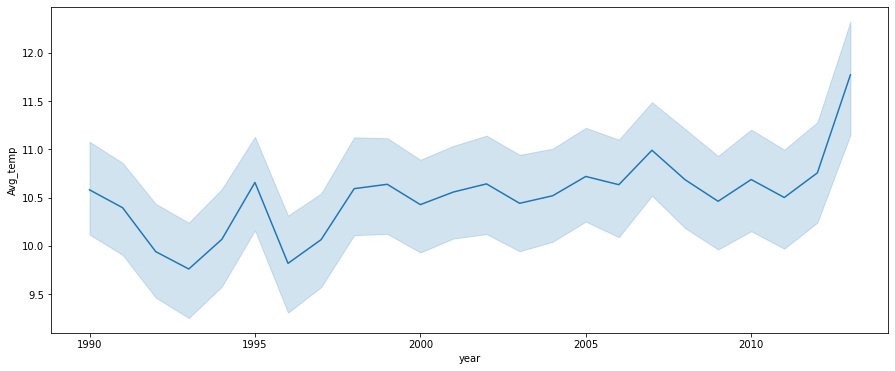

In [ ]:
plt.figure(figsize=(15,6))
sns.lineplot(x='year',y='Avg_temp',data=latest_df)
plt.show()

In [ ]:
resample_df = latest_df[['Avg_temp']].resample('A').mean()

In [ ]:
resample_df.head()

,Avg_temp
Date,
1990-12-31,10.579912
1991-12-31,10.394824
1992-12-31,9.940195
1993-12-31,9.760204
1994-12-31,10.067471


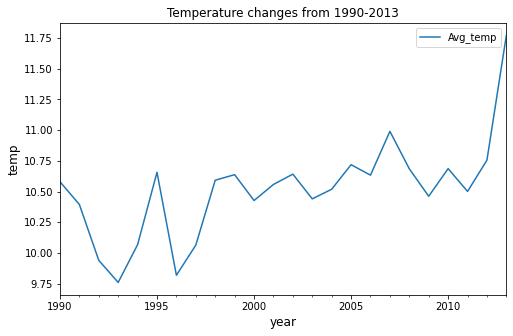

In [ ]:
resample_df.plot(title='Temperature changes from 1990-2013',figsize=(8,5))
plt.ylabel('temp',fontsize=12)
plt.xlabel('year',fontsize=12)
#plt.show()
plt.legend()

In [ ]:
from statsmodels.tsa.stattools import adfuller
print('dickey-fuller test rwsults')
test_df = adfuller(resample_df.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index=['test statistic','p-value','Lags used','number of observations used'])
for key,value in test_df[4].items():
  df_output['critical value is (%s)'%key]=value
print(df_output)  

adfuller test rwsults
test statistic                 -0.925319
p-value                         0.779520
Lags used                       7.000000
number of observations used    16.000000
critical value is (1%)         -3.924019
critical value is (5%)         -3.068498
critical value is (10%)        -2.673893
dtype: float64


In [ ]:
  decomp = seasonal_decompose(resample_df,freq=3)

  trend = decomp.trend
  seasonal = decomp.seasonal
  residual = decomp.resid

<Figure size 432x360 with 0 Axes>

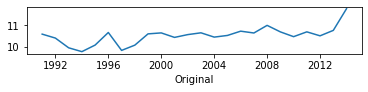

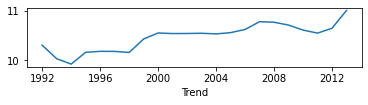

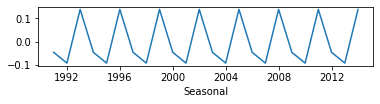

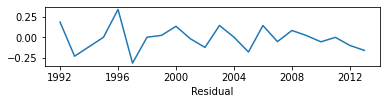

<Figure size 432x360 with 0 Axes>

In [ ]:
plt.subplot(411)
plt.plot(resample_df)
plt.xlabel('Original')
plt.figure(figsize=(6,5))


plt.subplot(412)
plt.plot(trend)
plt.xlabel('Trend')
plt.figure(figsize=(6,5))

plt.subplot(413)
plt.plot(seasonal)
plt.xlabel('Seasonal')
plt.figure(figsize=(6,5))

plt.subplot(414)
plt.plot(residual)
plt.xlabel('Residual')
plt.figure(figsize=(6,5))

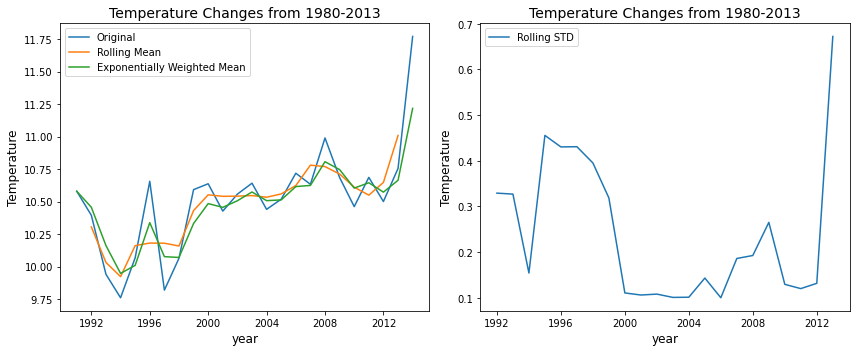

In [ ]:
rol_mean = resample_df.rolling(window=3,center=True).mean()
ewm = resample_df.ewm(span=3).mean()
rol_std = resample_df.rolling(window=3,center=True).std()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(resample_df,label='Original')
ax1.plot(rol_mean,label='Rolling Mean')
ax1.plot(ewm,label='Exponentially Weighted Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('year',fontsize=12)
ax1.legend()

ax2.plot(rol_std,label='Rolling STD')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('year',fontsize=12)
ax2.legend()

plt.tight_layout()
plt.show()

In [ ]:
rol_mean.dropna(inplace=True)
ewm.dropna(inplace=True)

print('dickey-fuller test rwsults for rolling mean')
df_test = adfuller(rol_mean.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index=['test statistic','p-value','Lags used','number of observations used'])
for key,value in test_df[4].items():
  df_output['critical value is (%s)'%key]=value
print(df_output)  
print(' ')
print('dickey-fuller test rwsults for exponentially weighted mean')
df_test = adfuller(ewm.iloc[:,0].values,autolag='AIC')
df_output = pd.Series(test_df[0:4],index=['test statistic','p-value','Lags used','number of observations used'])
for key,value in test_df[4].items():
  df_output['critical value is (%s)'%key]=value
print(df_output)  


dickey-fuller test rwsults for rolling mean
test statistic                 -0.925319
p-value                         0.779520
Lags used                       7.000000
number of observations used    16.000000
critical value is (1%)         -3.924019
critical value is (5%)         -3.068498
critical value is (10%)        -2.673893
dtype: float64
 
dickey-fuller test rwsults for exponentially weighted mean
test statistic                 -0.925319
p-value                         0.779520
Lags used                       7.000000
number of observations used    16.000000
critical value is (1%)         -3.924019
critical value is (5%)         -3.068498
critical value is (10%)        -2.673893
dtype: float64


In [ ]:
diff_rol_mean = resample_df-rol_mean
diff_rol_mean.dropna(inplace=True)
diff_rol_mean.head()

,Avg_temp
Date,
1991-12-31,0.089847
1992-12-31,-0.091546
1993-12-31,-0.162419
1994-12-31,-0.093977
1995-12-31,0.475714


In [ ]:
diff_ewm = resample_df-ewm
diff_ewm.dropna(inplace=True)
diff_ewm.head()

,Avg_temp
Date,
1990-12-31,0.000000
1991-12-31,-0.061696
1992-12-31,-0.221282
1993-12-31,-0.187261
1994-12-31,0.058067


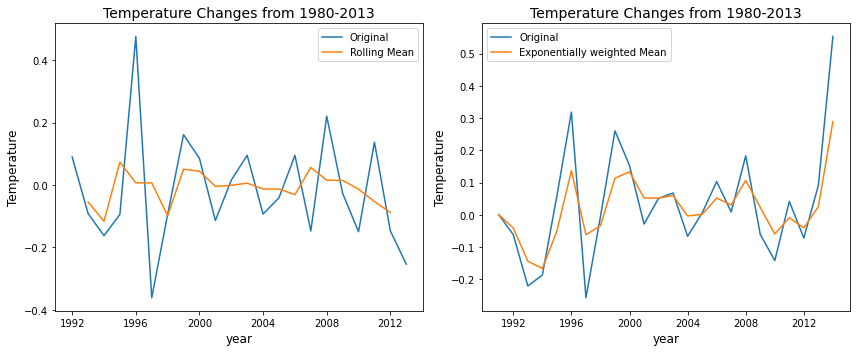

In [ ]:
df_rol_mean_diff = diff_rol_mean.rolling(window=3,center=True).mean()
df_ewm_diff = diff_ewm.ewm(span=3).mean()
fig,(ax1,ax2) = plt.subplots(1,2,figsize=(12,5))

ax1.plot(diff_rol_mean,label='Original')
ax1.plot(df_rol_mean_diff,label='Rolling Mean')
ax1.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax1.set_ylabel('Temperature',fontsize=12)
ax1.set_xlabel('year',fontsize=12)
ax1.legend()

ax2.plot(diff_ewm,label='Original')
ax2.plot(df_ewm_diff,label='Exponentially weighted Mean')
ax2.set_title('Temperature Changes from 1980-2013',fontsize=14)
ax2.set_ylabel('Temperature',fontsize=12)
ax2.set_xlabel('year',fontsize=12)
ax2.legend()

plt.tight_layout()

In [ ]:
print('dickey-fuller test for the difference between original and  rolling mean')
dftest = adfuller(diff_rol_mean.iloc[:,0].values,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['test statistic','p-value','Lags used','number of observations used'])
for key,value in dftest[4].items():
  dfoutput['critical value is (%s)'%key]=value
print(dfoutput)  
print(' ')
print('dickey-fuller test for the difference between original and  exponentially weighted mean')
dftest = adfuller(diff_ewm.iloc[:,0].values,autolag='AIC')
dfoutput = pd.Series(dftest[0:4],index=['test statistic','p-value','Lags used','number of observations used'])
for key,value in dftest[4].items():
  dfoutput['critical value is (%s)'%key]=value
print(dfoutput)  

dickey-fuller test for the difference between original and  rolling mean
test statistic                  0.491513
p-value                         0.984613
Lags used                       9.000000
number of observations used    12.000000
critical value is (1%)         -4.137829
critical value is (5%)         -3.154972
critical value is (10%)        -2.714477
dtype: float64
 
dickey-fuller test for the difference between original and  exponentially weighted mean
test statistic                 -2.741164
p-value                         0.067182
Lags used                       3.000000
number of observations used    20.000000
critical value is (1%)         -3.809209
critical value is (5%)         -3.021645
critical value is (10%)        -2.650713
dtype: float64


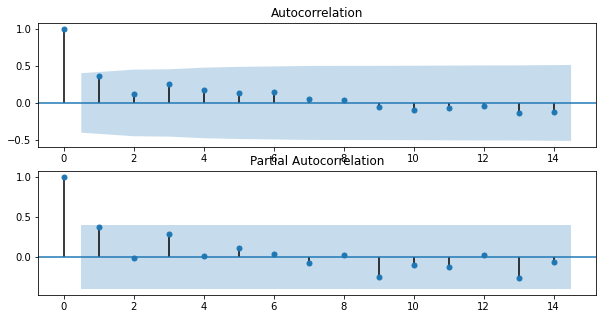

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf
from statsmodels.graphics.tsaplots import plot_pacf
from matplotlib import pyplot

pyplot.figure(figsize=(10,5))
pyplot.subplot(211)
plot_acf(resample_df,ax=pyplot.gca())
pyplot.subplot(212)
plot_pacf(resample_df,ax=pyplot.gca())
pyplot.show()